In [1]:
__author__ = 'Robert'
from images2gif import writeGif
from PIL import Image
import os

Capturing frames...
Enter the number of data points: 2


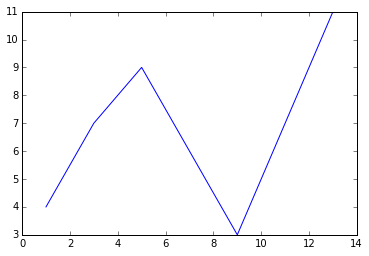

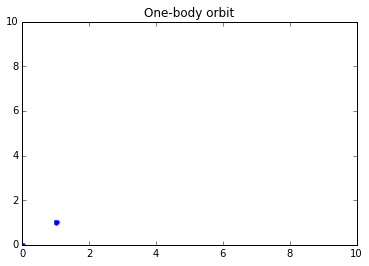

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
#for some reason, this seems to be necessary code as well
%matplotlib inline
x=(1, 3, 5, 9, 13);
y=(4, 7, 9, 3, 11);
plt.plot(x,y)
savefig('foo.png')

fig = figure() # initialize figure
ax = fig.add_subplot(111) # name of the plot

print ('Capturing frames...')
n = int(input('Enter the number of data points: '))
for i in range(n):
	ax.plot([i],[i],'b.',markersize=10)
	ax.set_xlim([0,10])
	ax.set_ylim([0,10])
	ax.set_title('One-body orbit')
	# record frames
	fname = '_tmppp%03d.png' %i # file name
	#frame_count += 1 # iterate frame count
	#if frame_count%20 == 0: print ('%i out of %i' %(frame_count,tfinal/dt))
	fig.savefig(fname)


Capturing frames...
Enter the number of data points: 2


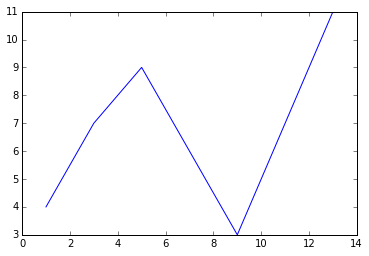

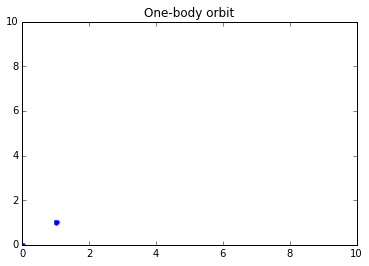

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
#for some reason, this seems to be necessary code as well
%matplotlib inline
x=(1, 3, 5, 9, 13);
y=(4, 7, 9, 3, 11);
plt.plot(x,y)
savefig('foo.png')

fig = figure() # initialize figure
ax = fig.add_subplot(111) # name of the plot

print ('Capturing frames...')
n = int(input('Enter the number of data points: '))
for i in range(n):
	ax.plot([i],[i],'b.',markersize=10)
	line, = plt.plot([i],[i], '-')
	ax.set_xlim([0,10])
	ax.set_ylim([0,10])
	ax.set_title('One-body orbit')
	savefig('foo[i].png')
	fname = '_dot%03d.png' %i # file name
	savefig(fname)
	#if frame_count%20 == 0: print ('%i out of %i' %(frame_count,tfinal/dt))
	#fig.savefig(fname)

NameError: name 'figure' is not defined

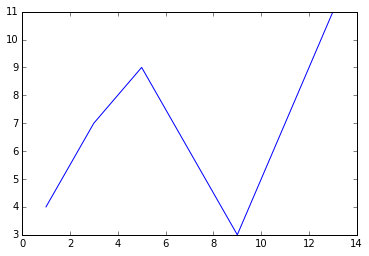

In [20]:
plt.plot(x,y)
figure,
f = getframe;
[im,map] = rgb2ind(f.cdata,256,'nodither');

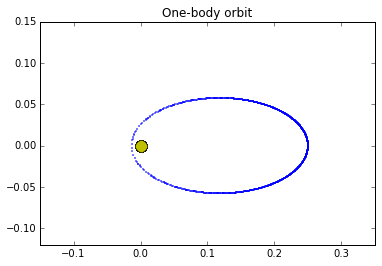

In [21]:
#cool code to generate multiple png files that could be used to build an animation

from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
 
'''
Numerical solution of the one-body problem using dopri5
'''
 
# Compute RHS of ODE, f(t,Y)
def f(t,Y):
    x,y,vx,vy = Y # define individual values
    d3 = (x**2+y**2)**1.5 # ||x||^3
    M = .5
    return array([vx,vy,-M*x/d3,-M*y/d3])
 
# initial parameters
t0 = 0 # initial start time
tfinal = 5 # final start time
dt = .005 # time step to solution (dopri5 algorithm uses adaptive)
y0 = array([.25,0.0,0.0,.45]) # initial position and velocity
 
# initiate integrator object
test = ode(f).set_integrator('dopri5',atol=1e-6) # prescribe tolerance for adaptive time step
test.set_initial_value(y0,t0) # set initial time and initial value
 
fig = figure() # initialize figure
ax = fig.add_subplot(111) # name of the plot
while test.successful() and test.t < tfinal:
    # integrate
    test.integrate(test.t+dt)
    # plot position
    ax.plot(test.y[0],test.y[1],'b.',markersize=2)
    ax.plot(0,0,'oy',markersize=12)
    ax.set_xlim([-.15,.35])
    ax.set_ylim([-.12,.15])
    ax.set_title('One-body orbit')
show() # show plot

Capturing frames...
20 out of 215
40 out of 215
60 out of 215
80 out of 215
100 out of 215
120 out of 215
140 out of 215
160 out of 215
180 out of 215
200 out of 215

Converting png files to animated gif (this maye take some time)...



1

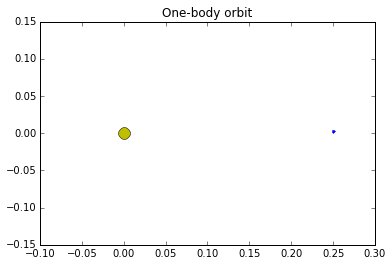

In [25]:
#but, the code at the end to generate a gif doesn't work

from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
import pdb
import os
import sys

'''
This file solves the one-body problem and shows a 2d animated gif. 
'''

# Compute RHS of ODE
def f(t,Y):
	x,y,vx,vy = Y # define individual values
	d3 = (x**2+y**2)**1.5 # ||x||^3
	M = .5
	return array([vx,vy,-M*x/d3,-M*y/d3])

# initial parameters
t0 = 0 # initial start time
tfinal = .43 # final start time
dt = .002 # time step to solution (dopri5 algorithm uses adaptive)
y0 = array([.25,0.0,0.0,.45]) # initial position and velocity (x,y,vx,vy)

# initiate integrator object
test = ode(f).set_integrator('dopri5',atol=1e-6) # prescribe tolerance for adaptive time step
test.set_initial_value(y0,t0) # set initial time and initial value

fig = figure() # initialize figure
ax = fig.add_subplot(111) # name of the plot
frame_count = 0
print ('Capturing frames...')
while test.successful() and test.t < tfinal:
	# integrate
	test.integrate(test.t+dt)
	# plot position
	ax.cla()
	ax.plot(test.y[0],test.y[1],'b.',markersize=6)
	ax.plot(0,0,'oy',markersize=12)
	ax.set_xlim([-.1,.3])
	ax.set_ylim([-.15,.15])
	ax.set_title('One-body orbit')
	# record frames
	fname = '_tmp%03d.png' %frame_count # file name
	frame_count += 1 # iterate frame count
	if frame_count%20 == 0: print ('%i out of %i' %(frame_count,tfinal/dt))
	fig.savefig(fname)

# converting png to animated gif
print ('\nConverting png files to animated gif (this maye take some time)...\n')
os.system("convert -delay 3 -loop 0 *.png " + "orbit.gif")
os.system("rm *.png *.pyc") # clean up files
os.system("animate orbit.gif") # play animates gif

pdb.set_trace()

In [ ]:
# converting png to animated gif
print ('\nConverting png files to animated gif (this maye take some time)...\n')
os.system("convert -delay 3 -loop 0 *.png " + "orbit.gif")
os.system("rm *.png *.pyc") # clean up files
os.system("animate orbit.gif") # play animates gif

#don't know what the heck this does, but it caused problems when i turned it on
#pdb.set_trace()


Converting png files to animated gif (this maye take some time)...

--Call--
> c:\anaconda3\lib\site-packages\ipython\core\displayhook.py(222)__call__()
-> def __call__(self, result=None):
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5
(Pdb) 5
5


In [20]:
import sys
from PIL import Image
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
import pdb
import os
import sys

im = open('_tmp197.png')

im = im.convert('RGB').convert('P', palette=Image.ADAPTIVE)
# The black index in the palette of this image is 255
im.save('mouse.gif', transparency=255)

AttributeError: '_io.TextIOWrapper' object has no attribute 'convert'

In [17]:
#!/usr/bin/env python
import sys
from PIL import Image

In [22]:
__author__ = 'Robert'
from images2gif import writeGif
from PIL import Image
import os

#file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
#['animationframa.png', 'animationframb.png', 'animationframc.png', ...] "

images = ['_tmp197.png', '_tmp198.png', '_tmp199.png', '_tmp200.png']

print (writeGif.__doc__)
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.


#images.extend(reversed(images)) #infinit loop will go backwards and forwards.

filename = "my_gif.GIF"
writeGif(filename, images, duration=0.2)
#54 frames written
#
#Process finished with exit code 0

 writeGif(filename, images, duration=0.1, repeat=True, dither=False)
    
    Write an animated gif from the specified images. 
    
    Parameters
    ----------
    filename : string
       The name of the file to write the image to.
    images : list
        Should be a list consisting of PIL images or numpy arrays. 
        The latter should be between 0 and 255 for integer types, and 
        between 0 and 1 for float types.
    duration : scalar or list of scalars
        The duration for all frames, or (if a list) for each frame.
    repeat : bool or integer
        The amount of loops. If True, loops infinitetely.
    dither : bool
        Whether to apply dithering
    nq : integer
        If nonzero, applies the NeuQuant quantization algorithm to create
        the color palette. This algorithm is superior, but slower than
        the standard PIL algorithm. The value of nq is the quality 
        parameter. 1 represents the best quality. 10 is in general a
        good trade

ValueError: Invalid image type: <class 'str'>

In [23]:
from scitools.std import movie
movie('*.png',fps=1,output_file='thisismygif.gif')

ImportError: No module named 'scitools'

In [24]:
import os

os.system("mencoder ...")

1

In [30]:
__author__ = 'Robert'
from images2gif import writeGif
from PIL import Image
import os

file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
#['animationframa.png', 'animationframb.png', 'animationframc.png', ...] "

images = [Image.open(fn) for fn in file_names]

print (writeGif.__doc__)
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.


#images.extend(reversed(images)) #infinit loop will go backwards and forwards.

filename = "my_gif.GIF"
writeGif(filename, images, duration=0.2)
#54 frames written
#
#Process finished with exit code 0

 writeGif(filename, images, duration=0.1, repeat=True, dither=False)
    
    Write an animated gif from the specified images. 
    
    Parameters
    ----------
    filename : string
       The name of the file to write the image to.
    images : list
        Should be a list consisting of PIL images or numpy arrays. 
        The latter should be between 0 and 255 for integer types, and 
        between 0 and 1 for float types.
    duration : scalar or list of scalars
        The duration for all frames, or (if a list) for each frame.
    repeat : bool or integer
        The amount of loops. If True, loops infinitetely.
    dither : bool
        Whether to apply dithering
    nq : integer
        If nonzero, applies the NeuQuant quantization algorithm to create
        the color palette. This algorithm is superior, but slower than
        the standard PIL algorithm. The value of nq is the quality 
        parameter. 1 represents the best quality. 10 is in general a
        good trade

TypeError: 'str' does not support the buffer interface

In [35]:
from images2gif import writeGif
from time import time

#Set to 24FPS
runningtime = 0.0416
print (runningtime)

print ('Saving')
filename = "mygif2.gif" 
writeGif(filename, images, duration=runningtime, dither=1, nq = 1)

0.0416
Saving


TypeError: unsupported operand type(s) for >>: 'float' and 'int'

In [49]:
# -24,7 +24,7 @@
 # See the README file for information on usage and redistribution.

from PIL import Image, ImageFile, ImagePalette, _binary
from PIL import Image, ImageFile, ImagePalette, ImageChops, ImageSequence, _binary
 
__version__ = "0.9"
 
# -284,8 +284,10 @@ def load_end(self):

def _save_all(im, fp, filename):
    _save(im, fp, filename, save_all=True) 
def _save(im, fp, filename):
    def _save(im, fp, filename, save_all=False):
 
     if _imaging_gif:
         # call external driver
        -315,23 +317,47
        def _save(im, fp, filename):
         palette = None
         im.encoderinfo["optimize"] = im.encoderinfo.get("optimize", True)
 
    header, used_palette_colors = getheader(im_out, palette, im.encoderinfo)
    for s in header:
        fp.write(s)
    if save_all:
        previous = None
 
    flags = 0
    for im_frame in ImageSequence.Iterator(im_out):
            # To specify duration, add the time in milliseconds to getdata(),
            # e.g. getdata(im_frame, duration=1000)
            if not previous:
                # global header
                for s in getheader(im_frame, palette, im.encoderinfo)[0] + getdata(im_frame):
                    fp.write(s)
            else:
                # delta frame
                delta = ImageChops.subtract_modulo(im_frame, previous)
                bbox = delta.getbbox()

                if bbox:
                    # compress difference
                    for s in getdata(im_frame.crop(bbox), offset=bbox[:2]):
                        fp.write(s)
                else:
                    # FIXME: what should we do in this case?
                    pass
            previous = im_frame.copy()
    else:
        header = getheader(im_out, palette, im.encoderinfo)[0]
        for s in header:
            fp.write(s)
 
if get_interlace(im):
        flags = flags | 64
        flags = 0
 
    # local image header
    get_local_header(fp, im, (0, 0), flags)
        if get_interlace(im):
            flags = flags | 64
 
    im_out.encoderconfig = (8, get_interlace(im))
    ImageFile._save(im_out, fp, [("gif", (0, 0)+im.size, 0,
                                  RAWMODE[im_out.mode])])
        # local image header
        _get_local_header(fp, im, (0, 0), flags)

        im_out.encoderconfig = (8, get_interlace(im))
        ImageFile._save(im_out, fp, [("gif", (0, 0)+im.size, 0,
                                      RAWMODE[im_out.mode])])
 
    fp.write(b"\0")  # end of image data
        fp.write(b"\0")  # end of image data
 
    fp.write(b";")  # end of file
    -354,7 +380,7 @@ def get_interlace(im):
    return interlace
 
def get_local_header(fp, im, offset, flags):
def _get_local_header(fp, im, offset, flags):
     transparent_color_exists = False
    try:
         transparency = im.encoderinfo["transparency"]
            -577,7 +603,7 @@ def write(self, data):
        im.encoderinfo = params
 
         # local image header
        get_local_header(fp, im, offset, 0)
        _get_local_header(fp, im, offset, 0)
 
         ImageFile._save(im, fp, [("gif", (0, 0)+im.size, 0, RAWMODE[im.mode])])
 
    -594,6 +620,7 @@ def write(self, data):
Image.register_open(GifImageFile.format, GifImageFile, _accept)
Image.register_save(GifImageFile.format, _save)
Image.register_save_all(GifImageFile.format, _save_all)
Image.register_extension(GifImageFile.format, ".gif")
Image.register_mime(GifImageFile.format, "image/gif")

IndentationError: unindent does not match any outer indentation level (<ipython-input-49-211e2d6488a0>, line 60)

In [59]:
#this will successfully convert one png to one gif file
from PIL import Image, ImageDraw

#img = open('_tmp197.png')

img = Image.open('_tmp197.png')
#img = '_tmp197.png'

#img = Image.new('RGBA',(100, 100))

#draw = ImageDraw.Draw(img)
#draw.ellipse((25, 25, 75, 75), fill=(255, 0, 0))

img.save('test2.gif', 'GIF', transparency=0)

In [60]:
#this will successfully convert one png to one gif file
from PIL import Image, ImageDraw

#img = open('_tmp197.png')

img = Image.open['_tmp197.png', '_tmp198.png']
#img = '_tmp197.png'

#img = Image.new('RGBA',(100, 100))

#draw = ImageDraw.Draw(img)
#draw.ellipse((25, 25, 75, 75), fill=(255, 0, 0))

img.save('test2.gif', 'GIF', transparency=0)

TypeError: 'function' object is not subscriptable

In [61]:
#this was close - i suspect my images2gif version is not compatible with python 3
__author__ = 'Robert'
from images2gif import writeGif
from PIL import Image
import os

#file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
#['animationframa.png', 'animationframb.png', 'animationframc.png', ...] "

images = ['_tmp197.png', '_tmp198.png', '_tmp199.png', '_tmp200.png']

print (writeGif.__doc__)
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.


#images.extend(reversed(images)) #infinit loop will go backwards and forwards.

filename = "my_gif.GIF"
writeGif(filename, images, duration=0.2)
#54 frames written
#
#Process finished with exit code 0

 writeGif(filename, images, duration=0.1, repeat=True, dither=False)
    
    Write an animated gif from the specified images. 
    
    Parameters
    ----------
    filename : string
       The name of the file to write the image to.
    images : list
        Should be a list consisting of PIL images or numpy arrays. 
        The latter should be between 0 and 255 for integer types, and 
        between 0 and 1 for float types.
    duration : scalar or list of scalars
        The duration for all frames, or (if a list) for each frame.
    repeat : bool or integer
        The amount of loops. If True, loops infinitetely.
    dither : bool
        Whether to apply dithering
    nq : integer
        If nonzero, applies the NeuQuant quantization algorithm to create
        the color palette. This algorithm is superior, but slower than
        the standard PIL algorithm. The value of nq is the quality 
        parameter. 1 represents the best quality. 10 is in general a
        good trade

ValueError: Invalid image type: <class 'str'>

In [11]:
# Import everything needed to edit video clips
from moviepy.editor import *

images = ['_tmp197.png', '_tmp198.png', '_tmp199.png', '_tmp200.png']

clip3 = VideoFileClip("sinc_mpl.gif").subclip(0,0.9)
clip4 = VideoFileClip("linechange9.gif").subclip(0,0.9)

# Overlay the text clip on the first video clip
video = CompositeVideoClip([clip3, clip4])

# Write the result to a file
video.write_videofile("animationattempt.avi",fps=24, codec='mpeg4')

Exception ignored in: <bound method VideoFileClip.__del__ of <moviepy.video.io.VideoFileClip.VideoFileClip object at 0x0A188350>>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\moviepy\video\io\VideoFileClip.py", line 86, in __del__
    del self.reader
AttributeError: reader
Exception ignored in: <bound method VideoFileClip.__del__ of <moviepy.video.io.VideoFileClip.VideoFileClip object at 0x0A188B30>>
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\moviepy\video\io\VideoFileClip.py", line 86, in __del__
    del self.reader
AttributeError: reader


OSError: [WinError 6] The handle is invalid

In [15]:
# Import everything needed to edit video clips
from moviepy.editor import *
test = VideoFileClip("linechange9.gif").subclip(0,0.5)

OSError: [WinError 6] The handle is invalid

In [3]:
# Import everything needed to edit video clips
from moviepy.editor import *
clip = VideoFileClip("sinc_mpl.gif").subclip(0,0.9)
clip2 = VideoFileClip("linechange9.gif").subclip(0,0.9)

# Overlay the text clip on the first video clip
video = CompositeVideoClip([clip, clip2])

# Write the result to a file
video.write_videofile("animationattempt2.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video animationattempt2.avi
[MoviePy] Writing video animationattempt2.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: animationattempt2.avi 



In [1]:
#THIS WORKS!
# Import everything needed to edit video clips
from moviepy.editor import *
clip3 = VideoFileClip("sinc_mpl.gif").subclip(0,0.9)
clip4 = VideoFileClip("linechange9.gif").subclip(0,0.9)

# Overlay the text clip on the first video clip
video = concatenate([clip3, clip4])

# Write the result to a file
video.write_videofile("animationattempt3.avi",fps=24, codec='mpeg4')

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



[MoviePy] >>>> Building video animationattempt3.avi
[MoviePy] Writing video animationattempt3.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: animationattempt3.avi 



In [15]:
# Make a video showing an image for 5 seconds
from moviepy.editor import *
from PIL import Image
#test2 = ImageClip("_tmp197.png") # has infinite duration
test4 = ImageClip("gallery5.png") # has infinite duration

#blend = concatenate([test2, test3]) # for some reason this doesn't work

test4.set_duration(5).write_videofile("gallery.avi",fps=24, codec='mpeg4') # works !

[MoviePy] >>>> Building video gallery.avi
[MoviePy] Writing video gallery.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: gallery.avi 



In [17]:
#THIS WORKS TO ANIMATE
#I'll try blending the two videos i've made from stills
from moviepy.editor import *
clip8 = VideoFileClip("_tmp197.avi").subclip(0,0.9)
clip9 = VideoFileClip("gallery.avi").subclip(0,0.9)

# Overlay the text clip on the first video clip
video = concatenate([clip6, clip7])

# Write the result to a file
video.write_videofile("animationattempt7.avi",fps=24, codec='mpeg4')

[MoviePy] >>>> Building video animationattempt7.avi
[MoviePy] Writing video animationattempt7.avi
[MoviePy] Done.
[MoviePy] >>>> Video ready: animationattempt7.avi 



In [73]:
from images2gif import writeGif
from PIL import Image
import os

#file_names = sorted((fn for fn in os.listdir('.') if fn.endswith('.png')))
#['animationframa.png', 'animationframb.png', 'animationframc.png', ...] "

images = [Image.open('_tmp197.png'), Image.open('_tmp198.png'), Image.open('_tmp199.png'), Image.open('_tmp200.png')]

print (writeGif.__doc__)
# writeGif(filename, images, duration=0.1, loops=0, dither=1)
#    Write an animated gif from the specified images.
#    images should be a list of numpy arrays of PIL images.
#    Numpy images of type float should have pixels between 0 and 1.
#    Numpy images of other types are expected to have values between 0 and 255.


#images.extend(reversed(images)) #infinit loop will go backwards and forwards.

#imagesbytes = images.encode('utf-8')

filename = "my_gifagain.GIF"
writeGif(filename, images, duration=0.2)
#54 frames written
#
#Process finished with exit code 0

 writeGif(filename, images, duration=0.1, repeat=True, dither=False)
    
    Write an animated gif from the specified images. 
    
    Parameters
    ----------
    filename : string
       The name of the file to write the image to.
    images : list
        Should be a list consisting of PIL images or numpy arrays. 
        The latter should be between 0 and 255 for integer types, and 
        between 0 and 1 for float types.
    duration : scalar or list of scalars
        The duration for all frames, or (if a list) for each frame.
    repeat : bool or integer
        The amount of loops. If True, loops infinitetely.
    dither : bool
        Whether to apply dithering
    nq : integer
        If nonzero, applies the NeuQuant quantization algorithm to create
        the color palette. This algorithm is superior, but slower than
        the standard PIL algorithm. The value of nq is the quality 
        parameter. 1 represents the best quality. 10 is in general a
        good trade

TypeError: 'str' does not support the buffer interface

In [74]:
os.system("convert -delay 3 -loop 0 *.png " + "orbit.gif")
os.system("rm *.png *.pyc") # clean up files
os.system("animate orbit.gif") # play animates gif

1

In [78]:
os.system("convert -delay 3 -loop 0 *.png " + "orbit.gif")

4

In [79]:
os.system("rm *.png *.pyc") # clean up files

1

In [81]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import ode
import pdb
import os
import sys

def f(t,Y):
	x = Y[0]
	y = Y[1]
	vx = Y[2]
	vy = Y[3]
	n = (x**2+y**2)**1.5
	return array([vx,vy,-.15*x/n,-.15*y/n])

t0 = 0
tfinal = .95
y0 = array([.25,0.0,0.0,.45])
dt = .005
N = round(tfinal/dt)

run1 = ode(f).set_integrator('dopri5',atol=1e-8)
run1.set_initial_value(y0,t0)
X = zeros(N)
Y = zeros(N)
count = 0
while run1.successful() and run1.t < tfinal:
	# integrate
	run1.integrate(run1.t+dt)
	X[count] = run1.y[0]
	Y[count] = run1.y[1]
	count += 1


fig = figure() # initialize figure
ax = fig.add_subplot(111) # subplot for position of walkers
frame_count = 0
decay = lambda r,c0,i: exp(-r*abs(c0-i))
r = .1250
for i in arange(N):
	ax.cla() 
	# plot all with decay transparency
	for j in arange(i):
		ax.plot(X[j],Y[j],'b.',markersize=6,alpha=decay(r,i,j)) # plot on axis
	# plot current position
	ax.plot(X[i],Y[i],'b.',markersize=6)
	ax.plot(0,0,'oy',markersize=12)
	ax.set_xlim([-.1,.3])
	ax.set_ylim([-.15,.15])
	ax.set_title('One-body orbit')
	# record frames
	fname = '_tmpp%03d.png' %frame_count # file name
	frame_count += 1 # iterate frame count
	if frame_count%10 == 0: print ('%i out of %i') %(frame_count,tfinal/dt)
	fig.savefig(fname)

# converting png to animated gif
print ('\nConverting png files to animated gif (this maye take some time)...\n')
os.system("convert -delay 3 -loop 0 *.png " + "orbit2.gif")
os.system("rm *.png *.pyc") # clean up files
os.system("animate orbit2.gif") # play animates gif

#pdb.set_trace()

%i out of %i


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

In [82]:
print ('\nConverting png files to animated gif (this maye take some time)...\n')
os.system("convert -delay 3 -loop 0 *.png " + "orbit2.gif")
os.system("rm *.png *.pyc") # clean up files
os.system("animate orbit2.gif") # play animates gif


Converting png files to animated gif (this maye take some time)...



1

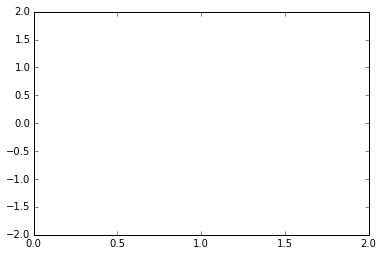

In [88]:
#this site looks useful, but code doesn't produce animation - can't make the movie either
#https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
#for some reason, this seems to be necessary code as well
%matplotlib inline

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()